> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 3.9 - Visualização de Dados

In [ ]:
# Para não dar erro nos plots: 
%pip install pandas numpy matplotlib seaborn plotly -q
%pip install --upgrade nbformat -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


# Matplotlib - Comando mágico e tema
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')  # Tema alternativo

# Seaborn - Alterar tema padrão
sns.set_theme(style="whitegrid", palette="husl")

# Plotly - Alterar tema padrão
import plotly.io as pio
pio.templates.default = "plotly_dark"


# CARREGANDO E PREPARAR OS DADOS:
# Ler o arquivo CSV
wc = pd.read_csv('wc_formatado_2.csv')

# Converter coluna de data para datetime
wc['data'] = pd.to_datetime(wc['data'])

# Remover jogos com comparecimento 0 (dados incorretos)
wc_clean = wc[wc['comparecimento'] > 0].copy()


Note: you may need to restart the kernel to use updated packages.


## Exercícios
Vamos trabalhar com as mesmas bases de dados do exercício de Pandas. Aqui estão os links caso você queira baixar novamente, mas recomendo trabalhar com o `wc_formatado.csv` que exportamos na questão Q2 do exercício anterior.

* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1930_2022.csv
* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1991_2023.csv

Para relembrar, essas são as colunas do dataframe:
```
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time_1             1312 non-null   string        
 1   time_2             1312 non-null   string        
 2   gols_1             1312 non-null   int64         
 3   gols_2             1312 non-null   int64         
 4   data               1312 non-null   datetime64[ns]
 5   ano                1312 non-null   int64         
 6   país_sede          1312 non-null   string        
 7   comparecimento     1312 non-null   int64         
 8   resultado          1312 non-null   string        
 9   rodada             1312 non-null   category      
 10  gols_1_detalhes    970 non-null    string        
 11  gols_2_detalhes    771 non-null    string        
 12  gols_1_contra      57 non-null     string        
 13  gols_2_contra      30 non-null     string        
 14  gols_1_penalti     170 non-null    string        
 15  gols_2_penalti     119 non-null    string        
 16  cartao_vermelho_1  59 non-null     string        
 17  cartao_vermelho_2  65 non-null     string        
 18  cartao_amarelo_1   834 non-null    string        
 19  cartao_amarelo_2   857 non-null    string        
 20  copa               1312 non-null   string 
```

#### Q1.
Realize todos os imports necessários para executar as três bibliotecas de visualização que conhecemos:
* Matplotlib (lembre-se do comando mágico)
* Seaborn
* Plotly

Para cada uma delas, altere o tema padrão de visualização. 

In [2]:

print("="*80)
print("ESTRUTURA DOS DADOS")
print("="*80)
print(f"\nTotal de jogos: {len(wc)}")
print(f"Jogos com comparecimento > 0: {len(wc_clean)}")
print(f"\nColunas disponíveis:")
print(wc.columns.tolist())
print(f"\nPrimeiras linhas:")
print(wc.head())
print(f"\nInformações do dataset:")
print(wc.info())


ESTRUTURA DOS DADOS

Total de jogos: 1312
Jogos com comparecimento > 0: 1286

Colunas disponíveis:
['time_1', 'time_2', 'gols_1', 'gols_2', 'data', 'ano', 'país_sede', 'comparecimento', 'resultado', 'rodada', 'gols_1_detalhes', 'gols_2_detalhes', 'gols_1_contra', 'gols_2_contra', 'gols_1_penalti', 'gols_2_penalti', 'cartao_vermelho_1', 'cartao_vermelho_2', 'cartao_amarelo_1', 'cartao_amarelo_2', 'copa']

Primeiras linhas:
      time_1     time_2  gols_1  gols_2       data   ano  \
0      Spain    England       1       0 2023-08-20  2023   
1     Sweden  Australia       2       0 2023-08-19  2023   
2  Australia    England       1       3 2023-08-16  2023   
3      Spain     Sweden       2       1 2023-08-15  2023   
4  Australia     France       0       0 2023-08-12  2023   

                país_sede  comparecimento    resultado             rodada  \
0  Australia, New Zealand           75784          1–0              Final   
1  Australia, New Zealand           49461          2–0  Thi

#### Q2.
Sobre os dados de copa do mundo, qual a distribuição de público presente nos jogos? Isso pode ser respondido com um histograma com os dados da coluna `comparecimento`.  

Lembre-se que alguns jogos estavam com público 0 incorretamente, que tal remover essas ocorrências para não atrapalhar sua visualzação?

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

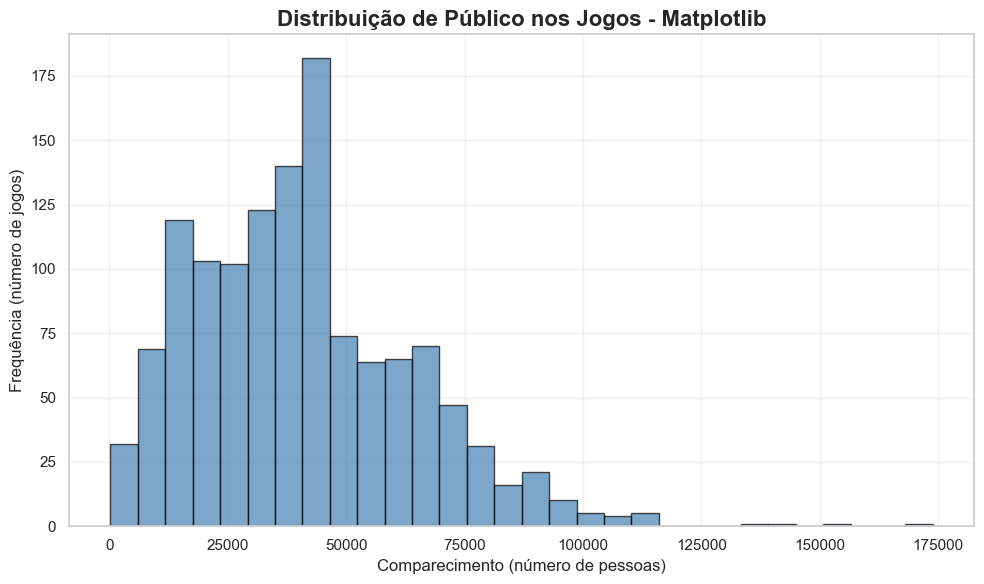

In [16]:
#### Solução com matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(wc_clean['comparecimento'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
ax.set_title('Distribuição de Público nos Jogos - Matplotlib', fontsize=16, fontweight='bold')
ax.set_xlabel('Comparecimento (número de pessoas)', fontsize=12)
ax.set_ylabel('Frequência (número de jogos)', fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

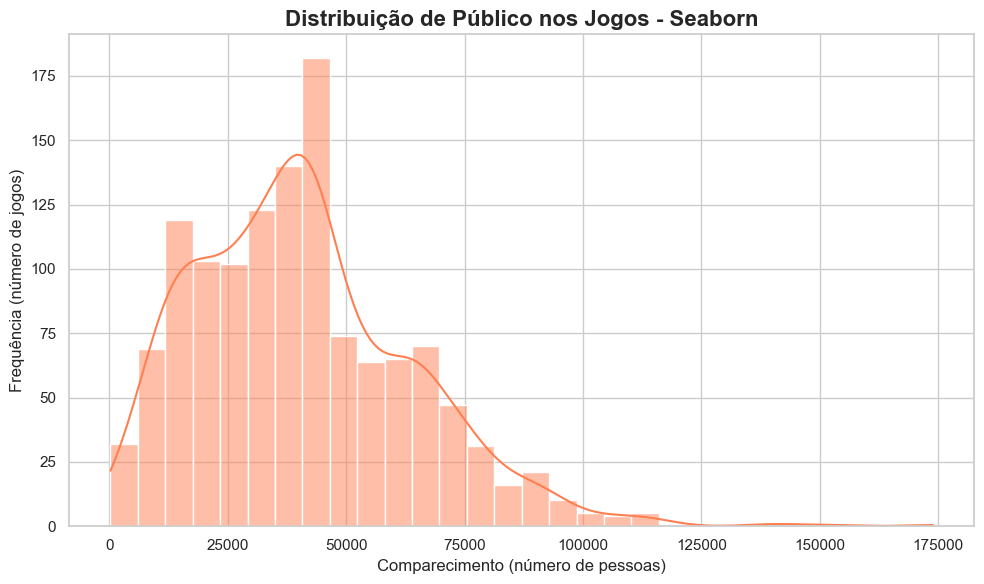

In [17]:
#### solução com seaborn
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=wc_clean, x='comparecimento', bins=30, kde=True, color='coral', ax=ax)
ax.set_title('Distribuição de Público nos Jogos - Seaborn', fontsize=16, fontweight='bold')
ax.set_xlabel('Comparecimento (número de pessoas)', fontsize=12)
ax.set_ylabel('Frequência (número de jogos)', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
#### solução com plotly
wc_clean = wc[wc['comparecimento'] > 0].copy()
fig = px.histogram(
    wc_clean, 
    x='comparecimento', 
    nbins=30,
    title='Distribuição de Público nos Jogos - Plotly',
    labels={'comparecimento': 'Comparecimento (número de pessoas)', 
            'count': 'Frequência (número de jogos)'},
    color_discrete_sequence=['#636EFA']
)
fig.update_layout(
    title_font_size=16,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12,
    height=500
)


Note: you may need to restart the kernel to use updated packages.


#### Q3.

Apresente um gráfico de dispersão (scatter) dos atributos `gols_1` e `gols_2`. Isso representa a relação entre gols feitos e gols tomados por jogo. Há alguma relação interessante entre esses atributos?

Para facilitar a visualização dos dados (já que tem muitos placares repetidos), aplique uma leve distorção aos dados para que cada ponto esteja deslocado aleatoriamente de seu valor original. Código apresentado a seguir
```python
gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc),2))
```

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

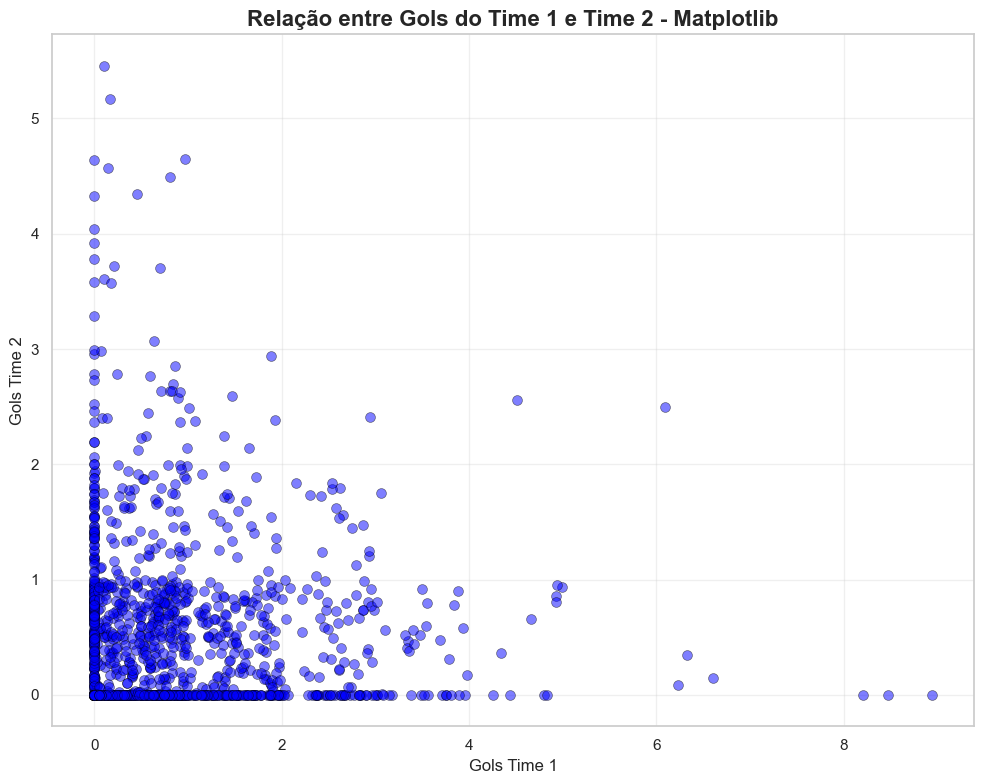

In [8]:
#### solução com matplotlib
np.random.seed(42)  # Para reprodutibilidade
gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc), 2))

# --- MATPLOTLIB ---
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(gols['gols_1'], gols['gols_2'], alpha=0.5, s=50, c='blue', edgecolors='black', linewidth=0.5)
ax.set_title('Relação entre Gols do Time 1 e Time 2 - Matplotlib', fontsize=16, fontweight='bold')
ax.set_xlabel('Gols Time 1', fontsize=12)
ax.set_ylabel('Gols Time 2', fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

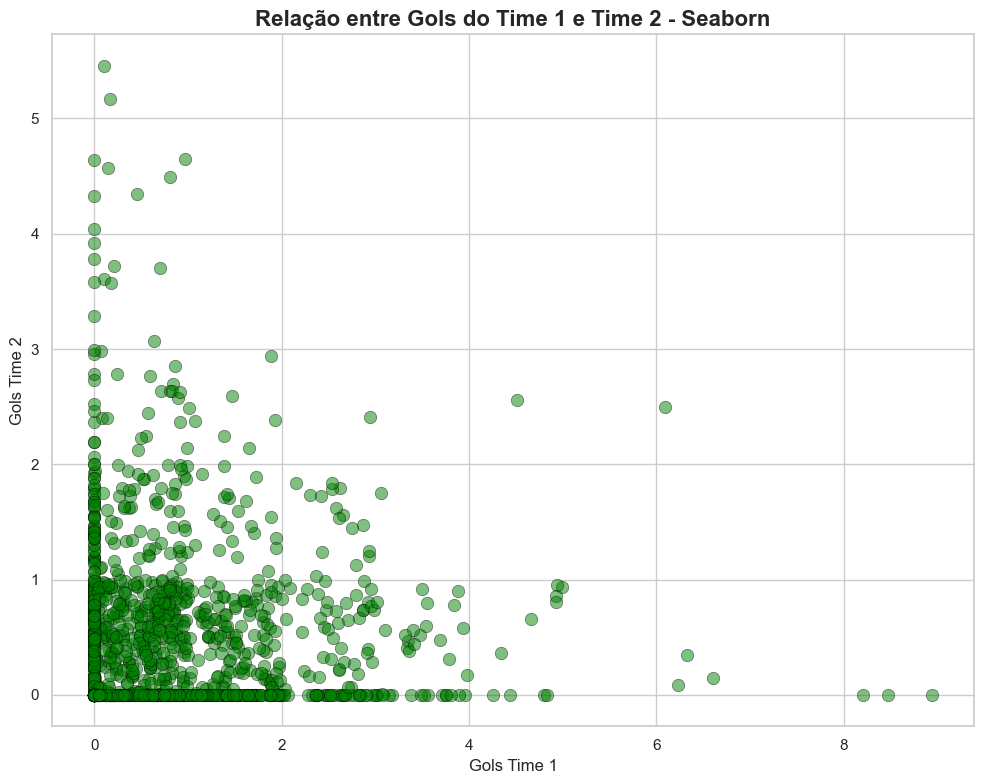

In [9]:
#### solução com seaborn
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='gols_1', y='gols_2', data=gols, alpha=0.5, s=80, color='green', edgecolor='black', linewidth=0.5, ax=ax)
ax.set_title('Relação entre Gols do Time 1 e Time 2 - Seaborn', fontsize=16, fontweight='bold')
ax.set_xlabel('Gols Time 1', fontsize=12)
ax.set_ylabel('Gols Time 2', fontsize=12)
plt.tight_layout()
plt.show()

In [5]:
#### solução com plotly
gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc), 2))

fig = px.scatter(
    gols, 
    x='gols_1', 
    y='gols_2',
    title='Relação entre Gols do Time 1 e Time 2 - Plotly',
    labels={'gols_1': 'Gols Time 1', 'gols_2': 'Gols Time 2'},
    opacity=0.5
)
fig.update_traces(marker=dict(size=8, line=dict(width=0.5, color='DarkSlateGray')))
fig.update_layout(
    title_font_size=16,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12,
    height=600
)
fig.show()

#### Q4.

Apresente um gráfico de barras com o top 10 países que mais participaram de copas do mundo, onde no eixo x devem estar o nome dos países e no eixo y a contagem de participações. Você deve separar a contagem de participações em copas femininas e masculinas, empilhando as barras de cada informação.

No exemplo de barras empilhadas da galeria do matplotlib, imagine que a parte azul são as participações do país em copas masculinas, e em laranja as participações femininas:
* https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos:
* título
* rótulos de dimensão.
* legenda

In [6]:
# Contar participações por país e copa
import pandas as pd
wc = pd.read_csv('wc_formatado_2.csv')
participacoes_time1 = wc[['time_1', 'copa']].rename(columns={'time_1': 'pais'})
participacoes_time2 = wc[['time_2', 'copa']].rename(columns={'time_2': 'pais'})
participacoes = pd.concat([participacoes_time1, participacoes_time2])

# Contar por país e tipo de copa
contagem = participacoes.groupby(['pais', 'copa']).size().reset_index(name='participacoes')

# Pivot para ter copas como colunas
pivot = contagem.pivot(index='pais', columns='copa', values='participacoes').fillna(0)

# Top 10 países
top10 = pivot.sum(axis=1).nlargest(10)
pivot_top10 = pivot.loc[top10.index]

print(f"\nTop 10 países:")
print(pivot_top10)


Top 10 países:
copa           Feminina  Masculina
pais                              
Brazil             37.0      114.0
England            33.0       74.0
Germany            47.0       56.0
Argentina          12.0       88.0
Italy              15.0       83.0
Sweden             47.0       51.0
France             24.0       73.0
United States      54.0       37.0
Spain              14.0       67.0
Netherlands        16.0       55.0


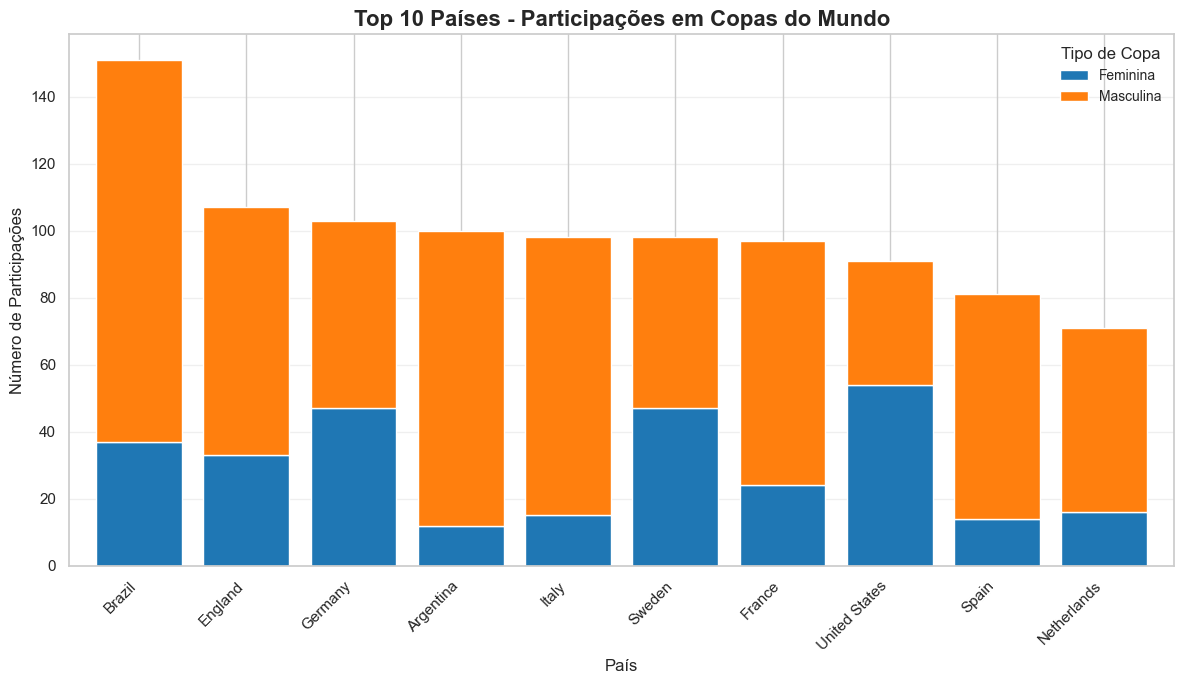

In [7]:
#### solução com matplotlib
fig, ax = plt.subplots(figsize=(12, 7))
pivot_top10.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'], width=0.8)
ax.set_title('Top 10 Países - Participações em Copas do Mundo', fontsize=16, fontweight='bold')
ax.set_xlabel('País', fontsize=12)
ax.set_ylabel('Número de Participações', fontsize=12)
ax.set_xticklabels(pivot_top10.index, rotation=45, ha='right')
ax.legend(title='Tipo de Copa', fontsize=10)
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

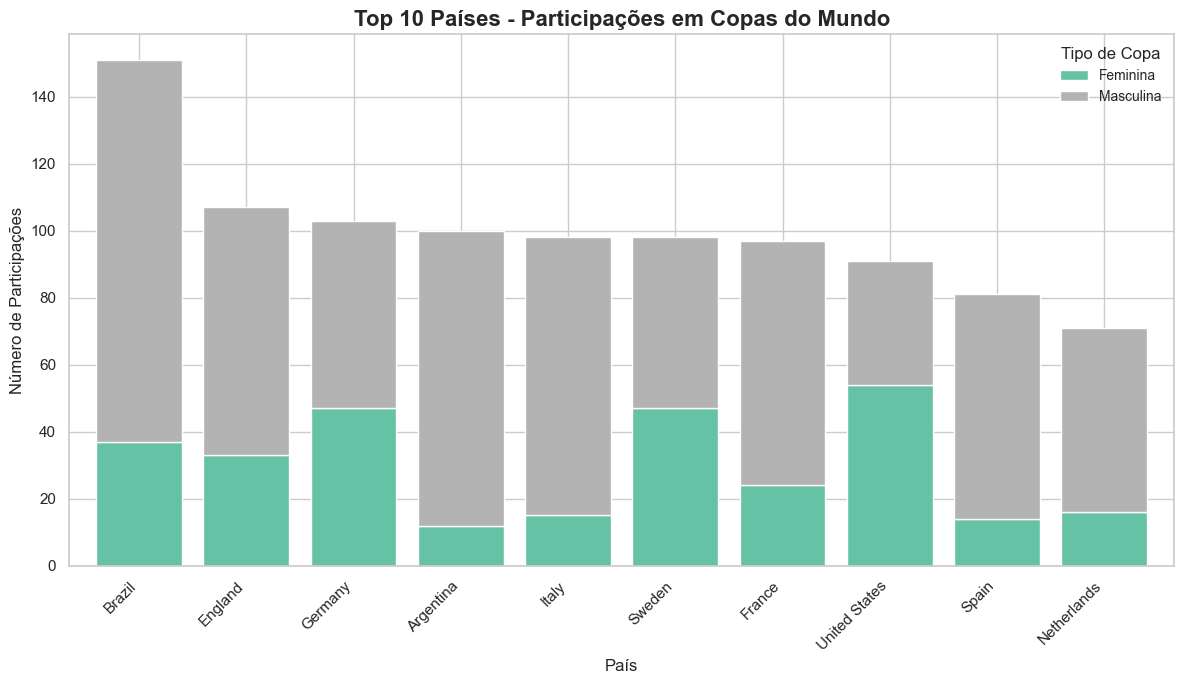

In [8]:
#### solução com seaborn
fig, ax = plt.subplots(figsize=(12, 7))
pivot_top10.plot(kind='bar', stacked=True, ax=ax, colormap='Set2', width=0.8)
ax.set_title('Top 10 Países - Participações em Copas do Mundo', fontsize=16, fontweight='bold')
ax.set_xlabel('País', fontsize=12)
ax.set_ylabel('Número de Participações', fontsize=12)
ax.set_xticklabels(pivot_top10.index, rotation=45, ha='right')
ax.legend(title='Tipo de Copa', fontsize=10)
plt.tight_layout()
plt.show()

In [9]:
#### solução com plotly
fig = go.Figure()
for col in pivot_top10.columns:
    fig.add_trace(go.Bar(
        name=col,
        x=pivot_top10.index,
        y=pivot_top10[col],
    ))

fig.update_layout(
    barmode='stack',
    title='Top 10 Países - Participações em Copas do Mundo',
    xaxis_title='País',
    yaxis_title='Número de Participações',
    title_font_size=16,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12,
    height=600,
    legend_title='Tipo de Copa'
)
fig.show()

#### Q5.

Vamos fazer um compilado com as estatísticas históricas de copas do mundo!

Com a biblioteca de sua preferência você deve criar 4 subplots organizados em um grid de 2 linhas e 2 colunas. Eles devem conter os seguintes gráficos:
* Linha 1, coluna 1: Gráfico de barras com a quantidade de jogos que aconteceram por ano
* Linha 1, coluna 2: Gráfico de área (referências a seguir) com o total de gols por ano, separando as informações de `gols_1` e `gols_2` para distinguir gols em casa e do time visitante.
* Linha 2, coluna 1: Gráfico de área com o total de cartões por ano, separando as informações de cartões amarelos e cartões vermelhos, mas agregando cartões do time 1 ou time 2. Ou seja, uma área com `cartao_amarelo_1 + cartao_amarelo_2` e outra área com `cartao_vermelho_1 + cartao_vermelho_2`.
* Linha 2, coluna 2: Gráfico de barras com o total de gols contra por ano, somando `gols_contra_1` e `gols_contra_2`.

Referências sobre gráfico de área
* Matplotlib: https://matplotlib.org/stable/gallery/lines_bars_and_markers/stackplot_demo.html#sphx-glr-gallery-lines-bars-and-markers-stackplot-demo-py
* Pandas + Matplotlib: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.area.html
* Seaborn: https://seaborn.pydata.org/generated/seaborn.objects.Area.html
* Plotly: https://plotly.com/python/filled-area-plots/

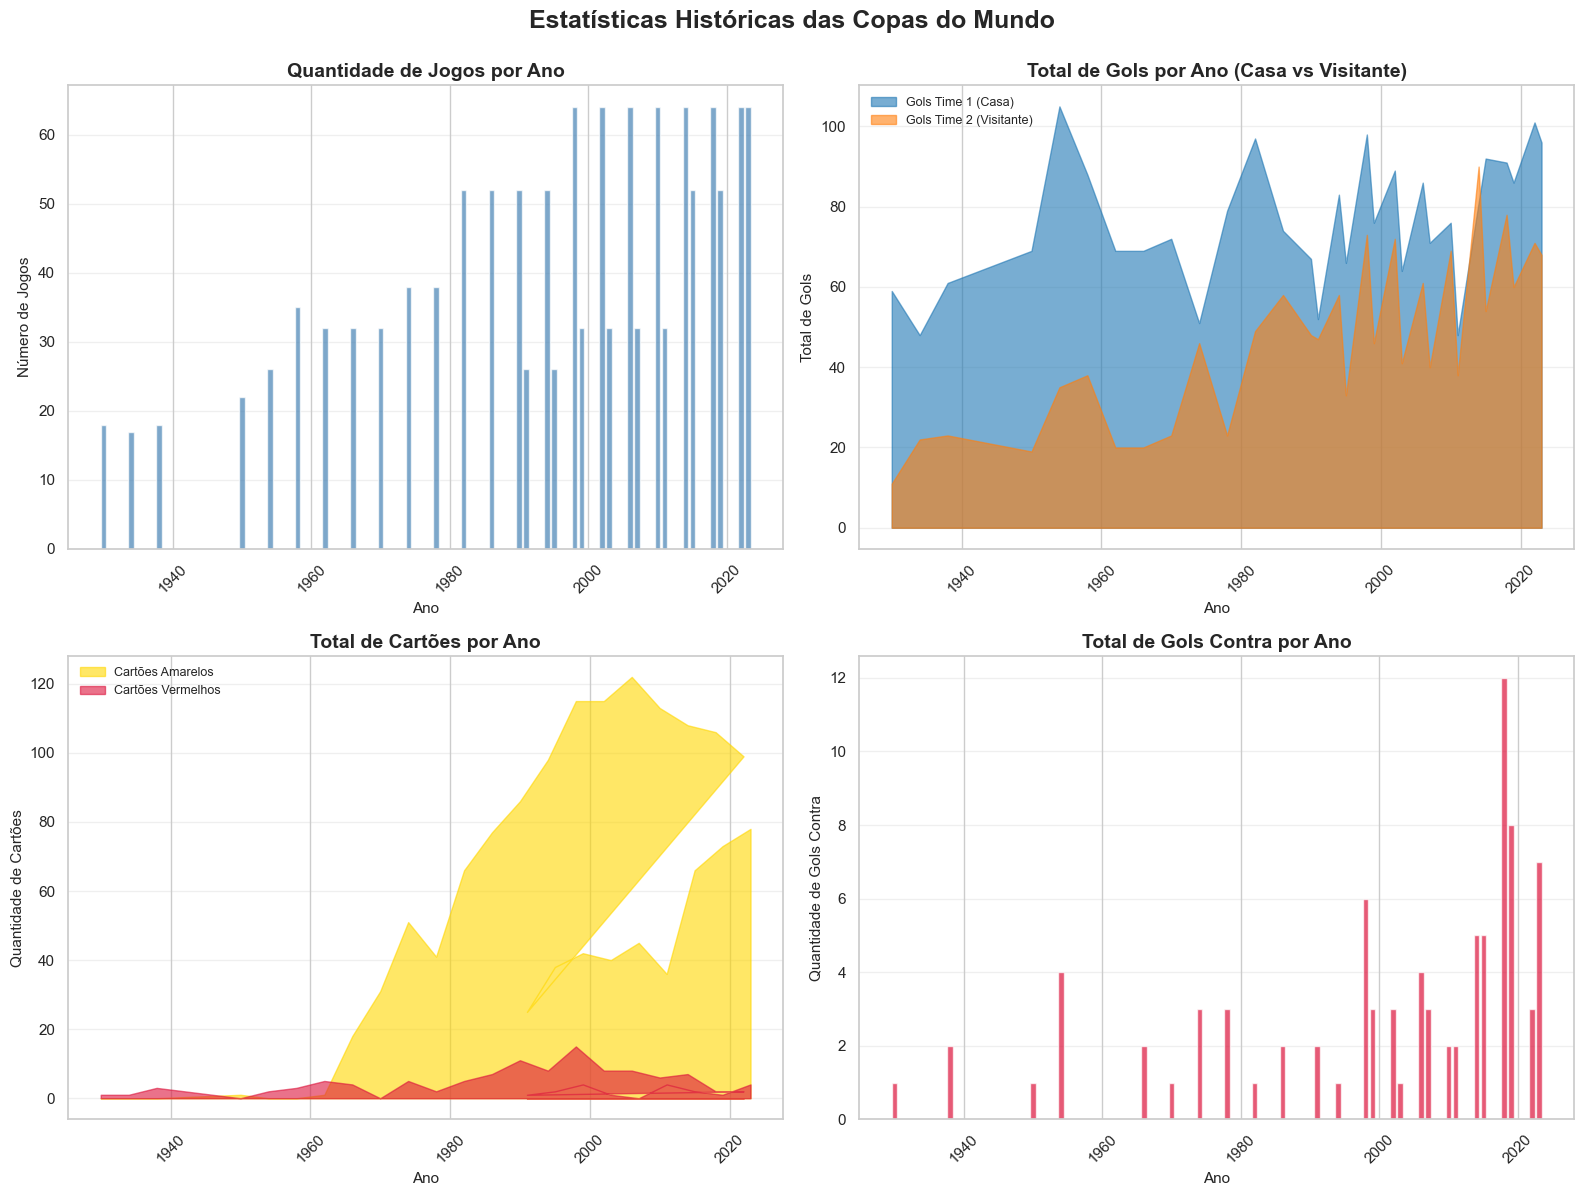

In [11]:
# Preparar dados agregados por ano
stats_por_ano = wc.groupby('ano').agg({
    'gols_1': 'sum',
    'gols_2': 'sum',
    'comparecimento': 'count'  # Número de jogos
}).reset_index()

# Processar cartões (convertendo listas de strings)
def contar_cartoes(df, coluna_prefixo):
    """Conta o número de cartões em colunas que contêm listas"""
    total_por_ano = []
    
    for ano in df['ano'].unique():
        df_ano = df[df['ano'] == ano]
        count = 0
        
        for col in [f'{coluna_prefixo}_1', f'{coluna_prefixo}_2']:
            if col in df.columns:
                # Conta registros não-nulos
                count += df_ano[col].notna().sum()
        
        total_por_ano.append({'ano': ano, 'total': count})
    
    return pd.DataFrame(total_por_ano)

cartoes_amarelos = contar_cartoes(wc, 'cartao_amarelo')
cartoes_vermelhos = contar_cartoes(wc, 'cartao_vermelho')

# Contar gols contra
def contar_gols_contra(df):
    total_por_ano = []
    
    for ano in df['ano'].unique():
        df_ano = df[df['ano'] == ano]
        count = 0
        
        for col in ['gols_1_contra', 'gols_2_contra']:
            if col in df.columns:
                count += df_ano[col].notna().sum()
        
        total_por_ano.append({'ano': ano, 'total': count})
    
    return pd.DataFrame(total_por_ano)

gols_contra_ano = contar_gols_contra(wc)

# Criar figura 2x2
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Estatísticas Históricas das Copas do Mundo', fontsize=18, fontweight='bold', y=0.995)

# 1. Quantidade de jogos por ano (Linha 1, Coluna 1)
axes[0, 0].bar(stats_por_ano['ano'], stats_por_ano['comparecimento'], color='steelblue', alpha=0.7)
axes[0, 0].set_title('Quantidade de Jogos por Ano', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Ano', fontsize=11)
axes[0, 0].set_ylabel('Número de Jogos', fontsize=11)
axes[0, 0].grid(True, alpha=0.3, axis='y')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Total de gols por ano - separado (Linha 1, Coluna 2)
x = stats_por_ano['ano']
axes[0, 1].fill_between(x, 0, stats_por_ano['gols_1'], alpha=0.6, label='Gols Time 1 (Casa)', color='#1f77b4')
axes[0, 1].fill_between(x, 0, stats_por_ano['gols_2'], alpha=0.6, label='Gols Time 2 (Visitante)', color='#ff7f0e')
axes[0, 1].set_title('Total de Gols por Ano (Casa vs Visitante)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Ano', fontsize=11)
axes[0, 1].set_ylabel('Total de Gols', fontsize=11)
axes[0, 1].legend(fontsize=9)
axes[0, 1].grid(True, alpha=0.3, axis='y')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Total de cartões por ano (Linha 2, Coluna 1)
if not cartoes_amarelos.empty and not cartoes_vermelhos.empty:
    x = cartoes_amarelos['ano']
    axes[1, 0].fill_between(x, 0, cartoes_amarelos['total'], alpha=0.6, label='Cartões Amarelos', color='#FFD700')
    axes[1, 0].fill_between(x, 0, cartoes_vermelhos['total'], alpha=0.6, label='Cartões Vermelhos', color='#DC143C')
    axes[1, 0].set_title('Total de Cartões por Ano', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Ano', fontsize=11)
    axes[1, 0].set_ylabel('Quantidade de Cartões', fontsize=11)
    axes[1, 0].legend(fontsize=9)
    axes[1, 0].grid(True, alpha=0.3, axis='y')
    axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Total de gols contra por ano (Linha 2, Coluna 2)
if not gols_contra_ano.empty:
    axes[1, 1].bar(gols_contra_ano['ano'], gols_contra_ano['total'], color='crimson', alpha=0.7)
    axes[1, 1].set_title('Total de Gols Contra por Ano', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Ano', fontsize=11)
    axes[1, 1].set_ylabel('Quantidade de Gols Contra', fontsize=11)
    axes[1, 1].grid(True, alpha=0.3, axis='y')
    axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()